In [19]:
# Importing necessary libraries for data analysis
import pandas as pd

# Load the dataset
dataset_path = 'C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Merged_flows_DB_Daily_Aggregated_Holidays_weekdays.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows and general information of the dataset to understand its structure
df_head = df.head()
df_info = df.info()

df_head, df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1826 non-null   int64 
 1   Date                           1826 non-null   object
 2   To Musina,Total_3201           1826 non-null   int64 
 3   To Musina,Light_3201           1826 non-null   int64 
 4   To Musina,Short HV_3201        1826 non-null   int64 
 5   To Musina,Medium HV_3201       1826 non-null   int64 
 6   To Musina,Long HV_3201         1826 non-null   int64 
 7   To Beit Bridge,Total_3201      1826 non-null   int64 
 8   To Beit Bridge,Light_3201      1826 non-null   int64 
 9   To Beit Bridge,Short HV_3201   1826 non-null   int64 
 10  To Beit Bridge,Medium HV_3201  1826 non-null   int64 
 11  To Beit Bridge,Long HV_3201    1826 non-null   int64 
 12  Road,Total_3201                1826 non-null   int64 
 13  Roa

(   Unnamed: 0        Date  To Musina,Total_3201  To Musina,Light_3201  \
 0           0  2018-01-01                  1566                  1323   
 1           1  2018-01-02                  2936                  2598   
 2           2  2018-01-03                  3825                  3428   
 3           3  2018-01-04                  4050                  3556   
 4           4  2018-01-05                  4247                  3697   
 
    To Musina,Short HV_3201  To Musina,Medium HV_3201  To Musina,Long HV_3201  \
 0                       36                        88                     119   
 1                       76                       123                     139   
 2                      104                        99                     194   
 3                      110                       143                     241   
 4                      153                       147                     250   
 
    To Beit Bridge,Total_3201  To Beit Bridge,Light_3201  \
 0    

In [20]:
# Convert the 'Holiday' column to binary format: 1 for values present and 0 for null values
df['Holiday'] = df['Holiday'].notna().astype(int)

# Show the first few rows to confirm that the transformation was successful
df_head_updated = df[['Holiday']].head()

df_head_updated


,Holiday
0,1
1,0
2,0
3,0
4,0


In [21]:
# Load the new dataset related to OPEC basket day price
opec_df = pd.read_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/OPEC_Fuel_price/basketDayArchives.csv')

# Convert the 'Date' columns in both datasets to datetime format for merging
df['Date'] = pd.to_datetime(df['Date'])
opec_df['Date'] = pd.to_datetime(opec_df['Date'])

# Merge the datasets on the 'Date' column
merged_df = pd.merge(df, opec_df, on='Date', how='left')

# Show the first few rows of the merged dataset to confirm successful integration
merged_df_head = merged_df.head()

merged_df_head


,Unnamed: 0,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201",...,"To Musina,Long HV_3202","Road,Total_3202","Road,Light_3202","Road,Short HV_3202","Road,Medium HV_3202","Road,Long HV_3202",Holiday,Day_of_Week,Weekday_or_Weekend,Price
0,0,2018-01-01,1566,1323,36,88,119,2521,2184,91,...,203,4082,3266,316,143,357,1,0,Weekday,NaN
1,1,2018-01-02,2936,2598,76,123,139,3919,3480,101,...,283,6848,5581,560,234,473,0,1,Weekday,64.84
2,2,2018-01-03,3825,3428,104,99,194,5135,4503,162,...,394,8895,7302,657,305,631,0,2,Weekday,65.13
3,3,2018-01-04,4050,3556,110,143,241,5459,4805,172,...,403,9471,7692,719,345,715,0,3,Weekday,66.13
4,4,2018-01-05,4247,3697,153,147,250,5291,4687,172,...,356,9443,7683,735,327,698,0,4,Weekday,65.86


In [22]:
# Perform linear interpolation to fill missing values in the 'Price' column
merged_df['Price'] = merged_df['Price'].interpolate()

# Set the first value in the 'Price' column to 64.84 as specified
merged_df['Price'].iloc[0] = 64.84

# Show the first few rows to confirm that the missing values have been filled and the specified value has been set
filled_values_head = merged_df[['Date', 'Price']].head()

filled_values_head


C:\Users\shume\AppData\Local\Temp\ipykernel_23992\3047730315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Price'].iloc[0] = 64.84


,Date,Price
0,2018-01-01,64.84
1,2018-01-02,64.84
2,2018-01-03,65.13
3,2018-01-04,66.13
4,2018-01-05,65.86


In [23]:
# List of stock dataset filenames
stock_files = [
    'AMS.JO_stock_data.csv',
    'BAW.JO_stock_data.csv',
    'FSR.JO_stock_data.csv',
    'HAR.JO_stock_data.csv',
    'SBK.JO_stock_data.csv',
    'SHP.JO_stock_data.csv',
    'WHL.JO_stock_data.csv'
]

# Loop through each stock dataset
for stock_file in stock_files:
    # Load the stock dataset
    stock_df = pd.read_csv(f"C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/stock index/{stock_file}")
    
    # Convert 'Date' to datetime format
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    
    # Extract relevant columns and rename
    stock_df = stock_df[['Date', 'Adj Close']].rename(columns={'Adj Close': stock_file.split('_')[0]})
    
    # Merge with main dataset
    if merged_df.empty:
        merged_df = stock_df
    else:
        merged_df = pd.merge(merged_df, stock_df, on='Date', how='left')

# Show the first few rows
print(merged_df.head())


   Unnamed: 0       Date  To Musina,Total_3201  To Musina,Light_3201  \
0           0 2018-01-01                  1566                  1323   
1           1 2018-01-02                  2936                  2598   
2           2 2018-01-03                  3825                  3428   
3           3 2018-01-04                  4050                  3556   
4           4 2018-01-05                  4247                  3697   

   To Musina,Short HV_3201  To Musina,Medium HV_3201  To Musina,Long HV_3201  \
0                       36                        88                     119   
1                       76                       123                     139   
2                      104                        99                     194   
3                      110                       143                     241   
4                      153                       147                     250   

   To Beit Bridge,Total_3201  To Beit Bridge,Light_3201  \
0                       252

In [24]:
# Change the decimal values to 2 places for all numeric columns
merged_df_rounded = merged_df.round(2)

# Show the first few rows to confirm that the rounding has been applied
merged_df_rounded_head = merged_df_rounded.head()

merged_df_rounded_head


,Unnamed: 0,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201",...,Day_of_Week,Weekday_or_Weekend,Price,AMS.JO,BAW.JO,FSR.JO,HAR.JO,SBK.JO,SHP.JO,WHL.JO
0,0,2018-01-01,1566,1323,36,88,119,2521,2184,91,...,0,Weekday,64.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-01-02,2936,2598,76,123,139,3919,3480,101,...,1,Weekday,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
2,2,2018-01-03,3825,3428,104,99,194,5135,4503,162,...,2,Weekday,65.13,28481.53,11659.14,4820.67,2251.28,13121.34,18282.21,5217.19
3,3,2018-01-04,4050,3556,110,143,241,5459,4805,172,...,3,Weekday,66.13,28481.53,11964.82,4810.01,2221.54,13300.00,18204.80,5114.04
4,4,2018-01-05,4247,3697,153,147,250,5291,4687,172,...,4,Weekday,65.86,29308.34,11990.98,4851.89,2182.19,13314.89,18732.23,5172.16


In [25]:
# Code to handle missing values in specified stock columns and update the first row

# List of stock columns to handle missing values
stock_columns = ["AMS.JO", "BAW.JO", "FSR.JO", "HAR.JO", "SBK.JO", "SHP.JO", "WHL.JO"]

# Apply linear interpolation to fill missing values for the specified stock columns
merged_df_rounded[stock_columns] = merged_df_rounded[stock_columns].interpolate()

# Copy the values from the second row to the first row for the specified stock columns
merged_df_rounded.loc[0, stock_columns] = merged_df_rounded.loc[1, stock_columns]

# Show the first few rows to confirm that the missing values have been handled and the first row updated
handled_first_row_head = merged_df_rounded[stock_columns].head()

handled_first_row_head


,AMS.JO,BAW.JO,FSR.JO,HAR.JO,SBK.JO,SHP.JO,WHL.JO
0,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
1,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
2,28481.53,11659.14,4820.67,2251.28,13121.34,18282.21,5217.19
3,28481.53,11964.82,4810.01,2221.54,13300.00,18204.80,5114.04
4,29308.34,11990.98,4851.89,2182.19,13314.89,18732.23,5172.16


In [26]:
# Drop the "Unnamed: 0" column
merged_df_rounded.drop("Unnamed: 0", axis=1, inplace=True)

# Change the 'Weekday_or_Weekend' column to a format suitable for time-series analysis
# Convert 'Weekday' to 0 and 'Weekend' to 1
merged_df_rounded['Weekday_or_Weekend'] = merged_df_rounded['Weekday_or_Weekend'].map({'Weekday': 0, 'Weekend': 1})

# Show the first few rows to confirm the changes
updated_df_head = merged_df_rounded.head()

updated_df_head


,Date,"To Musina,Total_3201","To Musina,Light_3201","To Musina,Short HV_3201","To Musina,Medium HV_3201","To Musina,Long HV_3201","To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201",...,Day_of_Week,Weekday_or_Weekend,Price,AMS.JO,BAW.JO,FSR.JO,HAR.JO,SBK.JO,SHP.JO,WHL.JO
0,2018-01-01,1566,1323,36,88,119,2521,2184,91,71,...,0,0,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
1,2018-01-02,2936,2598,76,123,139,3919,3480,101,100,...,1,0,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56
2,2018-01-03,3825,3428,104,99,194,5135,4503,162,133,...,2,0,65.13,28481.53,11659.14,4820.67,2251.28,13121.34,18282.21,5217.19
3,2018-01-04,4050,3556,110,143,241,5459,4805,172,153,...,3,0,66.13,28481.53,11964.82,4810.01,2221.54,13300.00,18204.80,5114.04
4,2018-01-05,4247,3697,153,147,250,5291,4687,172,128,...,4,0,65.86,29308.34,11990.98,4851.89,2182.19,13314.89,18732.23,5172.16


In [27]:
merged_df_rounded.to_csv('C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Main_data.csv')


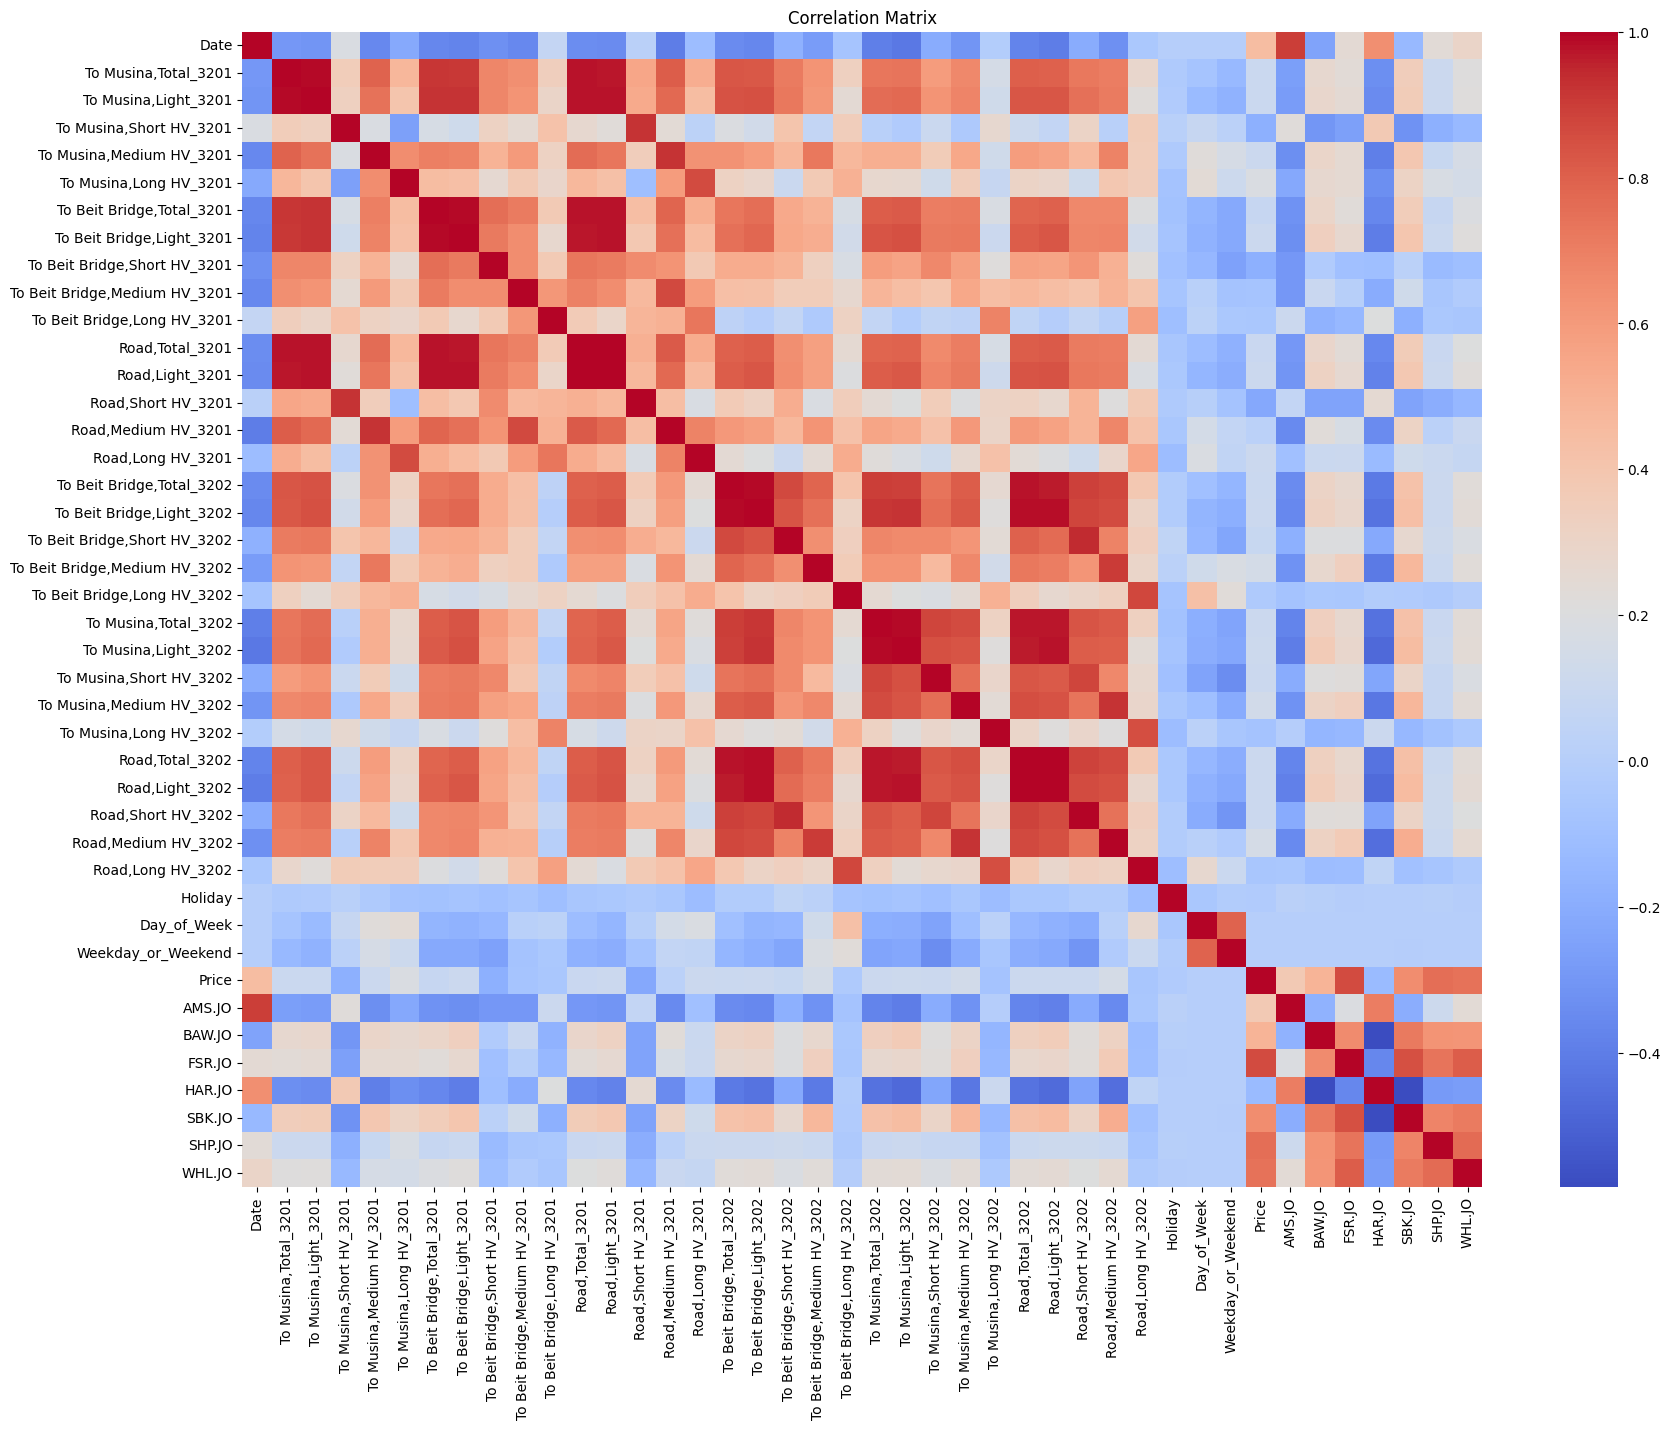

(                      Date  To Musina,Total_3201  To Musina,Light_3201  \
 count                 1826           1826.000000           1826.000000   
 mean   2020-07-01 12:00:00           2909.083242           2374.026835   
 min    2018-01-01 00:00:00              0.000000              0.000000   
 25%    2019-04-02 06:00:00           2504.500000           1988.500000   
 50%    2020-07-01 12:00:00           2893.000000           2351.500000   
 75%    2021-09-30 18:00:00           3432.000000           2839.000000   
 max    2022-12-31 00:00:00           8024.000000           7044.000000   
 std                    NaN            872.104534            776.039106   
 
        To Musina,Short HV_3201  To Musina,Medium HV_3201  \
 count              1826.000000               1826.000000   
 mean                157.750274                123.060241   
 min                   0.000000                  0.000000   
 25%                 119.000000                 99.000000   
 50%              

In [28]:
# Importing necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Generate summary statistics for the dataset
summary_stats = merged_df_rounded.describe()

# Correlation matrix to identify relationships between variables
correlation_matrix = merged_df_rounded.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

summary_stats, correlation_matrix.head()


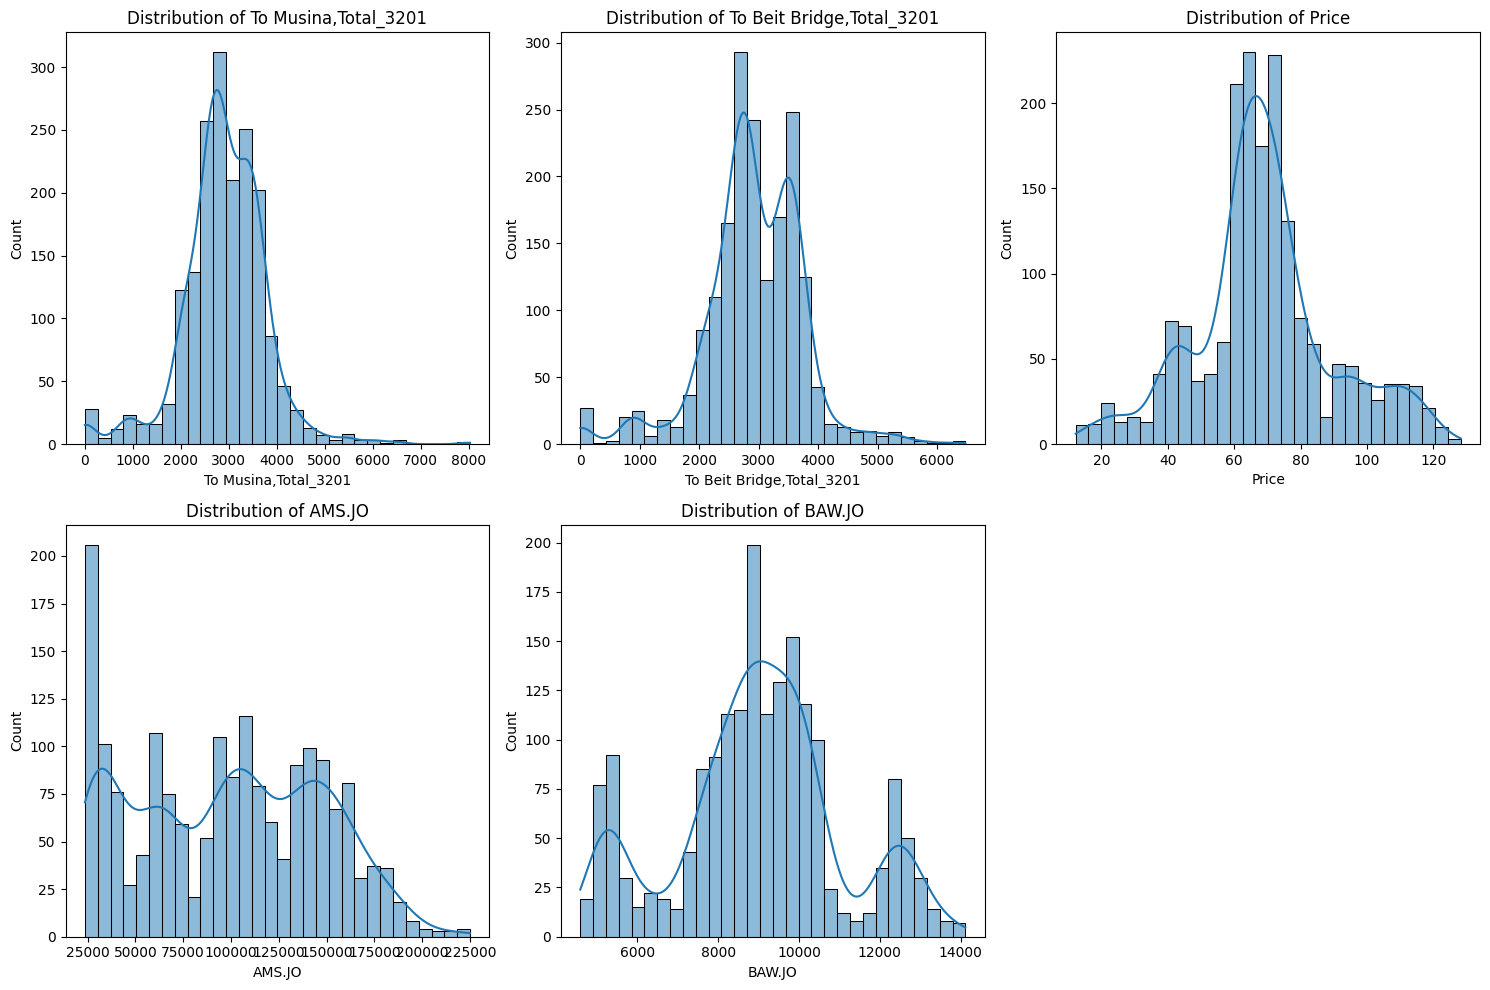

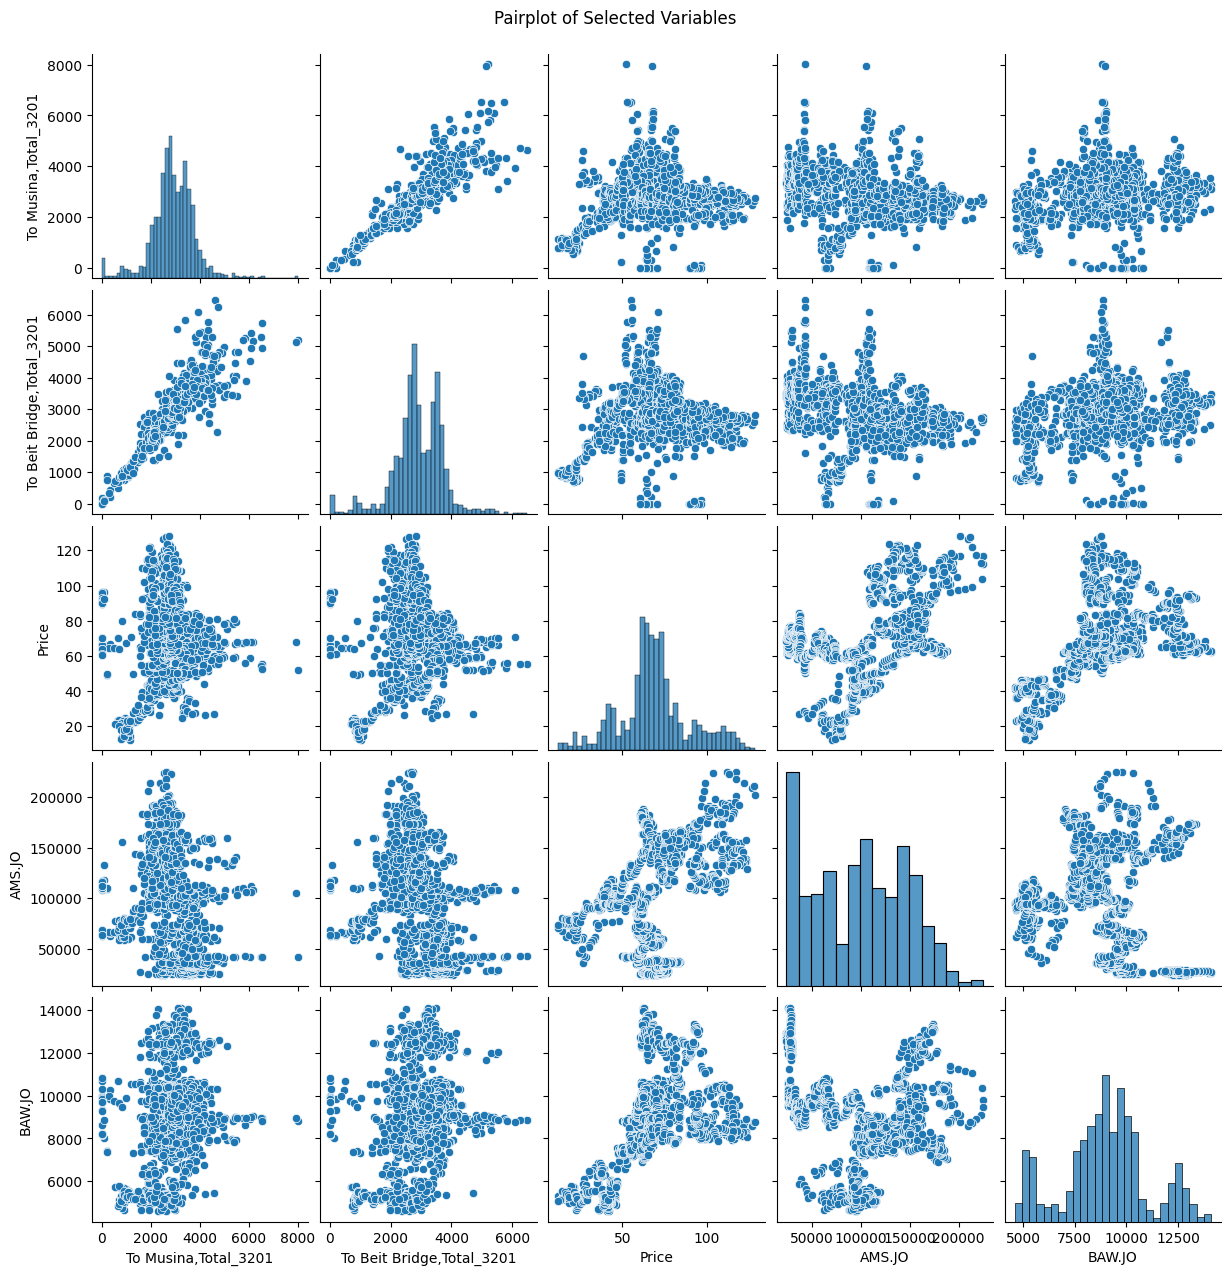

In [29]:
# Selecting a subset of columns for more detailed EDA
# Here we choose a few columns related to traffic, stock data, and the OPEC price for demonstration
selected_columns = ['To Musina,Total_3201', 'To Beit Bridge,Total_3201', 'Price', 'AMS.JO', 'BAW.JO']

# Plotting histograms for selected columns to understand the distribution
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_df_rounded[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Scatter plots to see relationships between some of the variables
sns.pairplot(merged_df_rounded[selected_columns])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


In [30]:
# Import necessary libraries for feature engineering
from datetime import datetime

# Convert the 'Date' column to datetime format
merged_df_rounded['Date'] = pd.to_datetime(merged_df_rounded['Date'])

# Create new features from the 'Date' column
merged_df_rounded['Year'] = merged_df_rounded['Date'].dt.year
merged_df_rounded['Month'] = merged_df_rounded['Date'].dt.month
merged_df_rounded['Day'] = merged_df_rounded['Date'].dt.day
merged_df_rounded['Weekday'] = merged_df_rounded['Date'].dt.weekday  # Monday=0, Sunday=6

# Display the first few rows of the DataFrame with the new features
merged_df_rounded[['Date', 'Year', 'Month', 'Day', 'Weekday']].head()


,Date,Year,Month,Day,Weekday
0,2018-01-01,2018,1,1,0
1,2018-01-02,2018,1,2,1
2,2018-01-03,2018,1,3,2
3,2018-01-04,2018,1,4,3
4,2018-01-05,2018,1,5,4


In [31]:
# Drop the columns that won't be used for training the model, including the original 'Date' column
X_new = merged_df_rounded.drop(['Date', 'To Musina,Total_3201'], axis=1)  # Removing target and unnecessary columns
y_new = merged_df_rounded['To Musina,Total_3201']  # Target variable

# Perform a time-based split for training and testing sets
# Sorting the DataFrame by 'Date' to maintain the time-based sequence
merged_df_rounded.sort_values('Date', inplace=True)

# Finding the index to split the data
split_index = int(len(merged_df_rounded) * 0.8)

# Split the data into training and testing sets based on the time-based split index
X_train_new = X_new.iloc[:split_index]
X_test_new = X_new.iloc[split_index:]
y_train_new = y_new.iloc[:split_index]
y_test_new = y_new.iloc[split_index:]

X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape


((1460, 44), (366, 44), (1460,), (366,))

In [32]:
# Import RandomForestRegressor from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize and train the Random Forest Regressor with the new feature set
rf_regressor_new = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
rf_regressor_new.fit(X_train_new, y_train_new)

# Make predictions on the new test set
y_pred_new = rf_regressor_new.predict(X_test_new)

# Evaluate the model using the same metrics as before: MSE, MAE, and R2 score
mse_new = mean_squared_error(y_test_new, y_pred_new)
mae_new = mean_absolute_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

mse_new, mae_new, r2_new


(2547.2227322404374, 33.65027322404372, 0.9948450117736782)

In [33]:
# Import the necessary library for performing k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

# Initialize a Random Forest Regressor
rf_regressor_cv = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

# Perform k-Fold Cross-Validation with k=5
cv_scores = cross_val_score(rf_regressor_cv, X_new, y_new, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_scores, cv_mean, cv_std


(array([0.98564171, 0.9854434 , 0.98794795, 0.97410358, 0.9944644 ]),
 0.9855202081483154,
 0.006576514335188369)

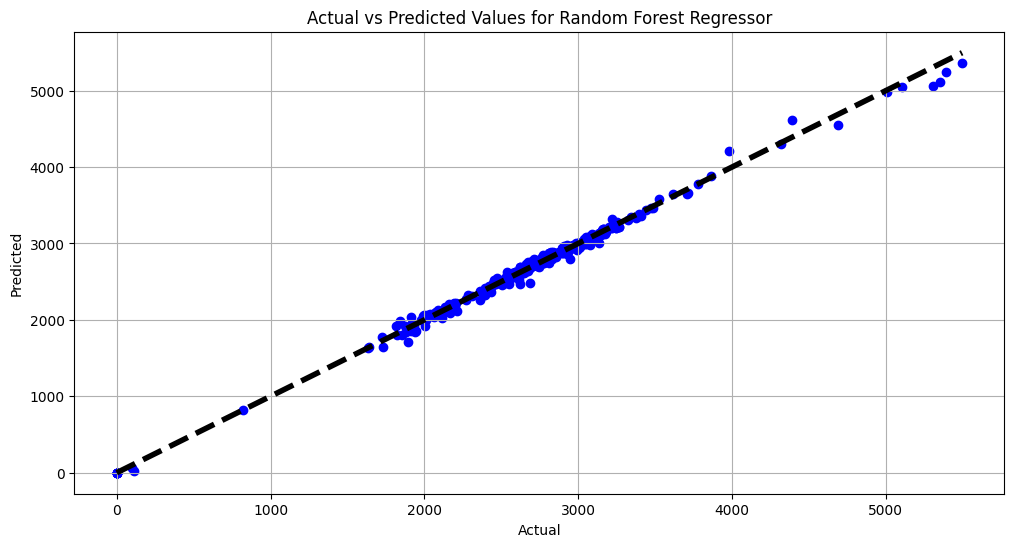

In [34]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Generate a scatter plot to visualize the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_new, y_pred_new, c='blue')
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.grid(True)
plt.show()
